In [3]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Change path before executing**

In [6]:
path = "/content/gdrive/MyDrive/ML Project/Project Report/"

## **Data Preprocessing**

In [7]:
movies_df = pd.read_csv(path+"Datasets/movie_success_rate.csv")

In [ ]:
movies_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.10000,757074.0000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.00000,485820.0000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.30000,157606.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.20000,60545.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.20000,393727.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,995.0,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012.0,88.0,6.70000,164088.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007.0,94.0,5.50000,73152.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008.0,98.0,6.20000,70699.0000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1000.0,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016.0,87.0,5.30000,12435.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **With Three Classes (good, bad and average)**

### **Logistic Regression and Decision Tree on the dataset**

In [8]:
movies_pos_neg = pd.read_csv(path+"Datasets/movie_pos_neg.csv")

In [9]:
movies_df = pd.merge(movies_pos_neg,movies_df, on=['Title'])

In [10]:
movies_df = movies_df.dropna()
movies_df.head()

,Unnamed: 0,Title,ID,positive,negative,result_category,Rank,Genre,Description,Director,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,0,Guardians of the Galaxy,d96cjJhvlMA,0.744898,0.255102,Good,1.0,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,Prometheus,HHcHYisZFLU,0.585859,0.414141,Average,2.0,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,Split,KIpGKumxiGg,0.602041,0.397959,Good,3.0,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,Suicide Squad,CmRih_VtVAs,0.762887,0.237113,Average,5.0,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,The Great Wall,avF6GHyyk5c,0.555556,0.444444,Average,6.0,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
x = movies_df[['Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']]
y = movies_df['Success']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y)

In [20]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [21]:
log_d = log.score(x_test,y_test)
log_d

0.8992248062015504

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
tree.predict(x_test)

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [24]:
tree_d = tree.score(x_test,y_test)
tree_d

1.0

### **Logistic Regression and Decion Tree (with positive negative comment ratio)**

In [25]:
movies_pos_neg = pd.read_csv(path+"Datasets/movie_pos_neg.csv")

In [26]:
movies_pos_neg = movies_pos_neg.drop(columns=['Unnamed: 0','ID','result_category'])

In [27]:
movies_df.columns

Index(['Unnamed: 0', 'Title', 'ID', 'positive', 'negative', 'result_category',
       'Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

In [28]:
movies_final_df = pd.merge(movies_pos_neg,movies_df, on=['Title'])

In [29]:
movies_final_df.head()

,Title,positive_x,negative_x,Unnamed: 0,ID,positive_y,negative_y,result_category,Rank,Genre,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,Guardians of the Galaxy,0.744898,0.255102,0,d96cjJhvlMA,0.744898,0.255102,Good,1.0,"Action,Adventure,Sci-Fi",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Prometheus,0.585859,0.414141,1,HHcHYisZFLU,0.585859,0.414141,Average,2.0,"Adventure,Mystery,Sci-Fi",...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,Split,0.602041,0.397959,2,KIpGKumxiGg,0.602041,0.397959,Good,3.0,"Horror,Thriller",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Suicide Squad,0.762887,0.237113,3,CmRih_VtVAs,0.762887,0.237113,Average,5.0,"Action,Adventure,Fantasy",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Great Wall,0.555556,0.444444,4,avF6GHyyk5c,0.555556,0.444444,Average,6.0,"Action,Adventure,Fantasy",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
x = movies_final_df[['Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War','positive_x','negative_x',
       'Western']]
y = movies_final_df['Success']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
log_pn = log.score(x_test,y_test)
log_pn

0.9457364341085271

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
tree_pn = tree.score(x_test,y_test)
tree_pn

0.9767441860465116

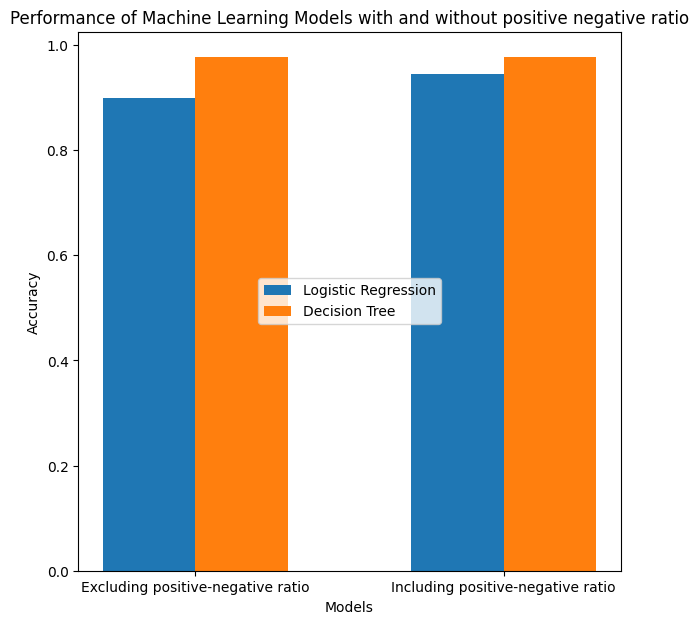

In [ ]:
import matplotlib.pyplot as plt

N = 2

blue_bar = (log_d,log_pn)
# Specify the values of orange bars (height)
orange_bar = (tree_d,tree_pn)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(7,7))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Logistic Regression')
plt.bar(ind + width, orange_bar, width, label='Decision Tree')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Performance of Machine Learning Models with and without positive negative ratio')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Excluding positive-negative ratio', 'Including positive-negative ratio'))

# Finding the best position for legends and putting it
plt.legend(loc='center')
plt.savefig("model-accuracy-comparison_3_1.pdf", bbox_inches = 'tight')
plt.show()

### **Logistic Regression and Decision Tree removing success and using Rating as the classification**

In [32]:
movies_df = movies_df.drop(columns = ['Success'])

In [33]:
movies_df.head()

,Unnamed: 0,Title,ID,positive,negative,result_category,Rank,Genre,Description,Director,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,Guardians of the Galaxy,d96cjJhvlMA,0.744898,0.255102,Good,1.0,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,Prometheus,HHcHYisZFLU,0.585859,0.414141,Average,2.0,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,Split,KIpGKumxiGg,0.602041,0.397959,Good,3.0,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,Suicide Squad,CmRih_VtVAs,0.762887,0.237113,Average,5.0,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,The Great Wall,avF6GHyyk5c,0.555556,0.444444,Average,6.0,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
movies_df.dropna()
def rating_classifier(x):
  if x > 7.0:
    return "Good"
  elif x > 5.0:
    return "Average"
  else:
    return "Bad"

movies_df['Rating'] = movies_df['Rating'].apply(rating_classifier)

In [35]:
movies_df = movies_df.dropna()

In [36]:
x = movies_df[['Year',
       'Runtime (Minutes)', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']]

y = movies_df[['Rating']]

In [38]:
x.head()

,Year,Runtime (Minutes),Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,Comedy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2014.0,121.0,757074.0,333.13,76.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2012.0,124.0,485820.0,126.46,65.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2016.0,117.0,157606.0,138.12,62.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2016.0,123.0,393727.0,325.02,40.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016.0,103.0,56036.0,45.13,42.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
y.head()

,Rating
0,Good
1,Average
2,Good
3,Average
4,Average


In [40]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [41]:
encoded_Y.shape

(642,)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,encoded_Y,test_size=0.2,stratify=y)

In [43]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(multi_class="multinomial", max_iter=3000)
log.fit(x_train,y_train)

LogisticRegression(max_iter=3000, multi_class='multinomial')

In [ ]:
log.predict(x_test)

array([0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2])

In [ ]:
l3 = log.score(x_test,y_test)
l3

0.7596899224806202

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train,y_train)
t3 = tree.score(x_test,y_test)

In [ ]:
tree.predict(x_test)

array([0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0])

### **Logistic Regression and Decision Tree removing success and using Rating as the classification (using positive negative comment ratio)**

In [45]:
movies_df.head()

,Unnamed: 0,Title,ID,positive,negative,result_category,Rank,Genre,Description,Director,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,Guardians of the Galaxy,d96cjJhvlMA,0.744898,0.255102,Good,1.0,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,Prometheus,HHcHYisZFLU,0.585859,0.414141,Average,2.0,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,Split,KIpGKumxiGg,0.602041,0.397959,Good,3.0,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,Suicide Squad,CmRih_VtVAs,0.762887,0.237113,Average,5.0,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,The Great Wall,avF6GHyyk5c,0.555556,0.444444,Average,6.0,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
movies_comm = pd.merge(movies_pos_neg, movies_df, on=["Title"])

In [47]:
movies_comm = movies_comm.drop(columns = ['result_category'])

In [48]:
movies_comm = movies_comm.drop(columns = ['Unnamed: 0'])

In [49]:
movies_comm.head()

,Title,positive_x,negative_x,ID,positive_y,negative_y,Rank,Genre,Description,Director,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Guardians of the Galaxy,0.744898,0.255102,d96cjJhvlMA,0.744898,0.255102,1.0,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Prometheus,0.585859,0.414141,HHcHYisZFLU,0.585859,0.414141,2.0,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Split,0.602041,0.397959,KIpGKumxiGg,0.602041,0.397959,3.0,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Suicide Squad,0.762887,0.237113,CmRih_VtVAs,0.762887,0.237113,5.0,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Great Wall,0.555556,0.444444,avF6GHyyk5c,0.555556,0.444444,6.0,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
X = movies_comm[['Year',
       'Runtime (Minutes)', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War','positive_x','negative_x',
       'Western']]

y = movies_comm['Rating']

In [51]:
X.head()

,Year,Runtime (Minutes),Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,positive_x,negative_x,Western
0,2014.0,121.0,757074.0,333.13,76.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.744898,0.255102,0.0
1,2012.0,124.0,485820.0,126.46,65.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.585859,0.414141,0.0
2,2016.0,117.0,157606.0,138.12,62.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.602041,0.397959,0.0
3,2016.0,123.0,393727.0,325.02,40.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.762887,0.237113,0.0
4,2016.0,103.0,56036.0,45.13,42.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555556,0.444444,0.0


In [52]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

In [53]:
encoded_Y

array([2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0,

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,encoded_Y,test_size=0.2,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(multi_class="multinomial",max_iter=3000)

logistic_model.fit(x_train,y_train)
logistic_model.score(x_test,y_test)

0.8294573643410853

In [ ]:
l4 = logistic_model.score(x_test,y_test)
l4

0.8294573643410853

In [ ]:
logistic_model.predict(x_test)

array([2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2])

In [ ]:
y_test

array([2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2])

In [ ]:
from sklearn.utils import multiclass
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.7674418604651163

In [ ]:
t4 = tree.score(x_test,y_test)
t4

0.7674418604651163

In [ ]:
y_test

array([0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2])

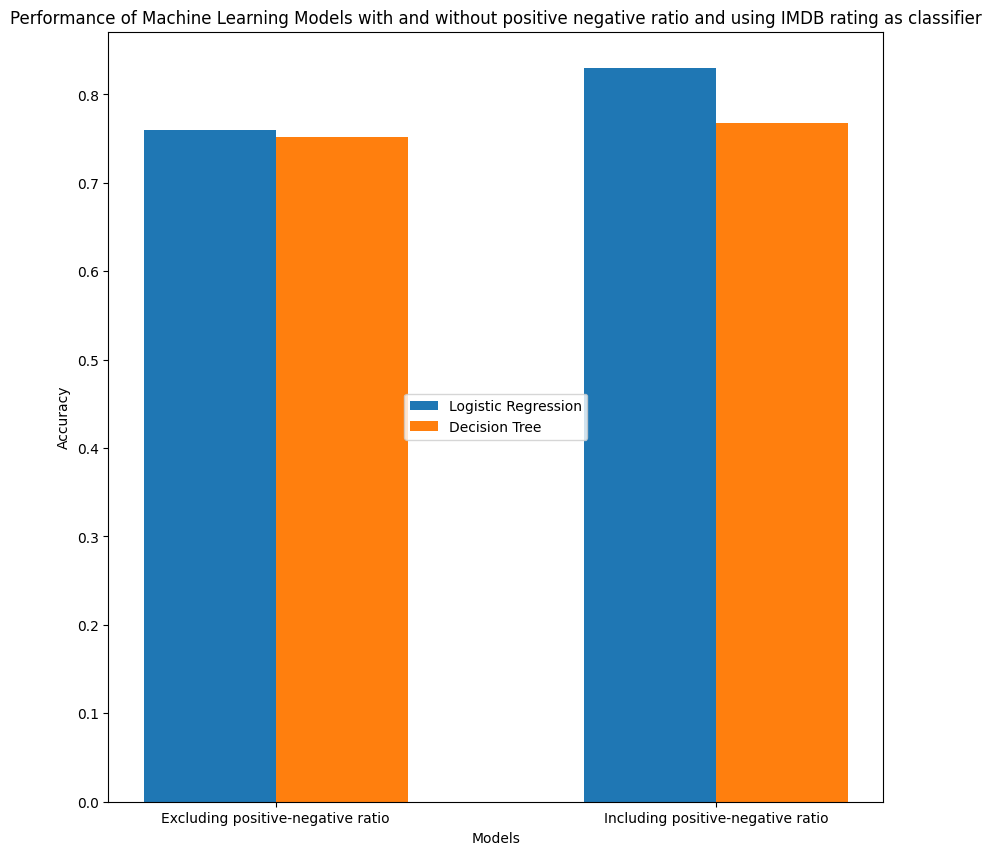

In [ ]:
import matplotlib.pyplot as plt

N = 2

blue_bar = (l3,l4)
# Specify the values of orange bars (height)
orange_bar = (t3,t4)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,10))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Logistic Regression')
plt.bar(ind + width, orange_bar, width, label='Decision Tree')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Performance of Machine Learning Models with and without positive negative ratio and using IMDB rating as classifier')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Excluding positive-negative ratio', 'Including positive-negative ratio'))

# Finding the best position for legends and putting it
plt.legend(loc='center')

plt.savefig("model-accuracy-comparison_3_2.pdf", bbox_inches = 'tight')
plt.show()

## **With 2 classes (Good and Bad)**

### Logistic Regression and Decision Tree over 2 classes (Good and Bad)

In [55]:
movies_df = pd.read_csv(path+"Datasets/movie_success_rate.csv")

In [56]:
movies_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
movies_df_mod = movies_df.dropna()

In [58]:

def rating_classifier(x):
  if x > 6.7:
    return "Good"
  else:
    return "Bad"

movies_df_mod['Rating'] = movies_df_mod['Rating'].apply(rating_classifier)

<ipython-input-58-20b5c7ca01e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_mod['Rating'] = movies_df_mod['Rating'].apply(rating_classifier)


In [59]:
movies_df_mod['Rating'].value_counts()

Good    455
Bad     383
Name: Rating, dtype: int64

In [60]:
movies_df_mod = movies_df_mod.drop(columns = ['Success'])

In [62]:
movies_df_mod = pd.merge(movies_pos_neg,movies_df_mod, on=["Title"])

In [64]:
X = movies_df_mod[['Year',
       'Runtime (Minutes)', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War','positive','negative',
       'Western']]

y = movies_df_mod['Rating']

In [65]:
X.head()

,Year,Runtime (Minutes),Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,positive,negative,Western
0,2014.0,121.0,757074.0,333.13,76.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.744898,0.255102,0.0
1,2012.0,124.0,485820.0,126.46,65.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.585859,0.414141,0.0
2,2016.0,117.0,157606.0,138.12,62.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.602041,0.397959,0.0
3,2016.0,123.0,393727.0,325.02,40.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.762887,0.237113,0.0
4,2016.0,103.0,56036.0,45.13,42.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555556,0.444444,0.0


In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel2class = LogisticRegression(max_iter=3000)

logmodel2class.fit(x_train,y_train)

LogisticRegression(max_iter=3000)

In [ ]:
logmodel2class.predict(x_test)

array(['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad',
       'Good', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good',
       'Good', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Good',
       'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad',
       'Bad', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad',
       'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good',
       'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad',
       'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad',
       'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad',
       'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad',
       'Good', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad',
       'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Goo

In [ ]:
y_test

310     Bad
323     Bad
367     Bad
3       Bad
348     Bad
       ... 
108     Bad
578     Bad
214     Bad
16      Bad
91     Good
Name: Rating, Length: 129, dtype: object

In [ ]:
logmodel2class.score(x_test,y_test)

0.8604651162790697

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree2class = DecisionTreeClassifier()
tree2class.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
tree2class.predict(x_test)

array(['Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Bad',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad',
       'Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Good',
       'Good', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad',
       'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good',
       'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good',
       'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad',
       'Good', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Bad',
       'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad',
       'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good',
       'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good',
       'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good',
       'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Go

In [ ]:
y_test

310     Bad
323     Bad
367     Bad
3       Bad
348     Bad
       ... 
108     Bad
578     Bad
214     Bad
16      Bad
91     Good
Name: Rating, Length: 129, dtype: object

In [ ]:
tree2class.score(x_test,y_test)

0.7596899224806202

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.6923076923076923